In [1]:
import sys
sys.path.append('../')

import os
import copy
import time
import pickle
import numpy as np
import matplotlib, matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import torch
import itertools
from torch.autograd import Variable
import sklearn, sklearn.model_selection, sklearn.metrics
import numpy as np
from scipy import sparse
from data import datasets
from data.gene_graphs import GeneManiaGraph,  OntologyGraph
from data.utils import record_result

%load_ext autoreload
%autoreload 2


In [4]:
filename = "../experiments/results/fs_MB_A_iC10.pkl"
results = pickle.load(open(filename, "rb"), encoding='latin1')

In [6]:
gene_graph =  OntologyGraph(neighbors=30, embeddings_name='el')

 loading from cache file/auto/homes/mt675/gene-graph-conv-onto/data/graphs/ontology_el_30.adjlist.gz


In [22]:
color_dict = {
    'MLP_random_genes': '#1f77b4',
    'MLP_ontology_selected_genes': '#ff7f0e',
    'GCN_ontology_selected_genes': '#2ca02c',
}

In [19]:
displayname

'MLP_ontology_selected_genes'

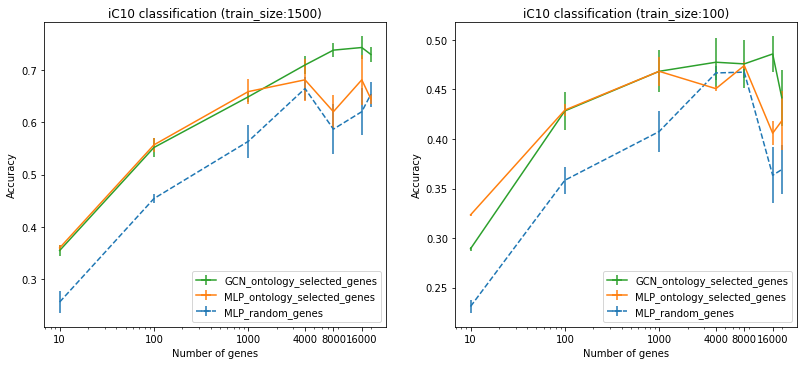

In [27]:
## Graphs for iC10 task

filename = "../experiments/results/fs_MB_A_iC10.pkl"
results = pickle.load(open(filename, "rb"), encoding='latin1')

plt.rcParams['figure.figsize'] = (13.5, 5.6)
fig, axs = plt.subplots(1,2, sharex=True, sharey=False)

for i, plot_train_size in enumerate([1500,100]):
    subset = results[(results.train_size==plot_train_size) & 
                      (results.gene==plot_gene) & 
#                       (results.num_genes!=8000) &  
                      (results.num_genes!=2000) & 
                      (results.num_genes!=200) &
                      (results.num_genes!=500) &
                      (results.num_genes> 0)  &      
                      ((results.graph == "ontology_el_10" ) | (results.graph == "ontology_dl2vec_300" ) | (results.graph == "ontology_dl2vec_10_randomized" ))]

    q = subset.groupby(['model', 'graph', 'num_genes'])['acc']

    todo = [x for x in itertools.product(list(subset["graph"].unique()),list(subset["model"].unique()))]
    if plot_train_size == 100:
        for ls, (graph, model) in enumerate(sorted(todo)):
             if (('GCN_noemb_lay1_chan16' in model  and 'dropout' in model and 'randomize' not in graph )  or \
                 'MLP_lay2' in model and 'dropout' in model):# or 'randomize' in graph):
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-', c= color_dict[displayname])
                except:
                    pass
    else:
        for ls, (graph, model) in enumerate(sorted(todo)):
            if  (('GCN_noemb_lay1_chan32' in model  and 'randomize' not in graph )  or \
                 ('MLP_lay2' in model and 'dropout' not in model)):# or 'randomize' in graph):_lay1_chan64
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-', c= color_dict[displayname])
                except:
                    pass
    

    axs[i].set_title("iC10 classification (train_size:" + str(plot_train_size) +")")
    axs[i].set_ylabel("Accuracy")
    axs[i].set_xlabel("Number of genes")
    axs[i].set_xscale("log")
    axs[i].set_xticks([10,100,1000,4000,8000,16000])# sorted(subset["num_genes"].unique()))
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)

    handles, labels = axs[i].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    axs[i].legend(handles, labels, loc='lower right');
    
plt.savefig("../experiments/results/figures/fs-iC10.eps", bbox_inches='tight', format='eps')
plt.show()


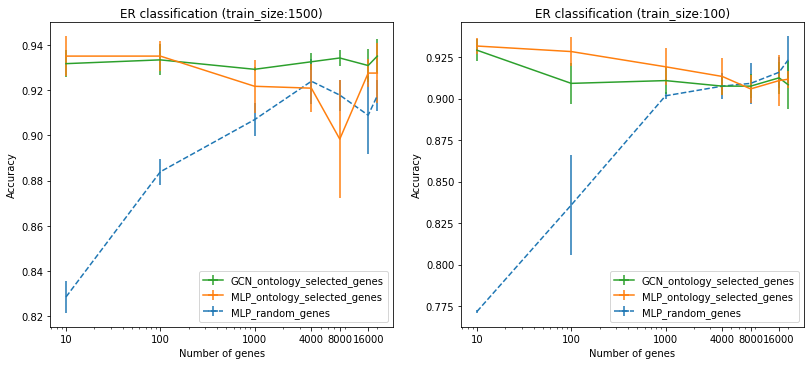

In [28]:
## Graphs for ER task

filename = "../experiments/results/fs_MB_A_ER.pkl"
results = pickle.load(open(filename, "rb"), encoding='latin1')

plt.rcParams['figure.figsize'] = (13.5, 5.6)
fig, axs = plt.subplots(1,2, sharex=True, sharey=False)

for i, plot_train_size in enumerate([1500,100]):
    subset = results[(results.train_size==plot_train_size) & 
                      (results.gene==plot_gene) & 
#                       (results.num_genes!=8000) &  
                      (results.num_genes!=2000) & 
                      (results.num_genes!=200) &
                      (results.num_genes!=500) &
                      (results.num_genes> 0)  &      
                      ((results.graph == "ontology_el_10" ) | (results.graph == "ontology_dl2vec_300" ) | (results.graph == "ontology_dl2vec_10_randomized" ))]

    q = subset.groupby(['model', 'graph', 'num_genes'])['acc']

    todo = [x for x in itertools.product(list(subset["graph"].unique()),list(subset["model"].unique()))]
    if plot_train_size == 100:
        for ls, (graph, model) in enumerate(sorted(todo)):
             if  'SNLR' not in model and 'lr.0.00001' not in model and  \
                (('GCN_noemb_lay1' in model  and 'dropout' not in model and 'randomize' not in graph )  or \
                ('GCN_noemb_lay2' in model  and 'randomize' not in graph )  or \
                 'MLP_lay1' in model):# or 'randomize' in graph):
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-', c= color_dict[displayname])
                except:
                    pass
    else:
        for ls, (graph, model) in enumerate(sorted(todo)):
            if  'SNLR' not in model and 'lr.0.00001' not in model and  \
                (('GCN_noemb_lay1_chan64_dropout_agg_hierarchical' in model  and 'lr' not in model and 'randomize' not in graph )  or \
                ('GCN_noemb_lay2' in model  and 'randomize' not in graph )  or \
                 ('MLP_lay1' in model and 'lr.0.001'  not in model and 'dropout'  not in model)):# or 'randomize' in graph):_lay1_chan64
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-', c= color_dict[displayname])
                except:
                    pass
    

    axs[i].set_title("ER classification (train_size:" + str(plot_train_size) +")")
    axs[i].set_ylabel("Accuracy")
    axs[i].set_xlabel("Number of genes")
    axs[i].set_xscale("log")
    axs[i].set_xticks([10,100,1000,4000,8000,16000])# sorted(subset["num_genes"].unique()))
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)

    handles, labels = axs[i].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    axs[i].legend(handles, labels, loc='lower right');

plt.savefig("../experiments/results/figures/fs-ER.eps", bbox_inches='tight', format='eps')
plt.show()


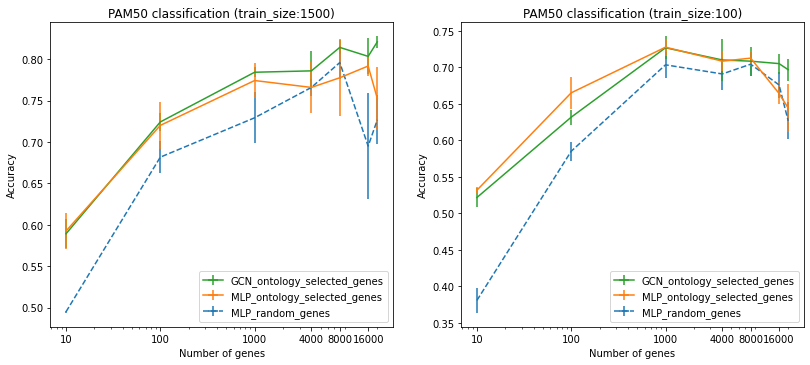

In [29]:
# Figure for PAM50 feature selection

filename = "../experiments/results/fs_MB_A_PAM50.pkl"
results = pickle.load(open(filename, "rb"), encoding='latin1')

plt.rcParams['figure.figsize'] = (13.5, 5.6)
fig, axs = plt.subplots(1,2, sharex=True, sharey=False)

for i, plot_train_size in enumerate([1500,100]):
#     %matplotlib inline
#     plt.rcParams['figure.figsize'] = (7.5, 3.6)
    subset = results[(results.train_size==plot_train_size) & 
                      (results.gene==plot_gene) & 
#                       (results.num_genes!=8000) &  
                      (results.num_genes!=2000) & 
                      (results.num_genes!=200) &
                      (results.num_genes!=500) &
                      (results.num_genes> 0)  &      
                      ((results.graph == "ontology_el_10" ) | (results.graph == "ontology_dl2vec_300" ) | (results.graph == "ontology_dl2vec_10_randomized" ))]

    q = subset.groupby(['model', 'graph', 'num_genes'])['acc']

    todo = [x for x in itertools.product( list(subset["graph"].unique()),list(subset["model"].unique()))]
    if plot_train_size == 100:
        for ls, (graph, model) in enumerate(sorted(todo)):
             if (('GCN_noemb_lay1' in model  and 'dropout' not in model and 'randomize' not in graph )  or \
                ('GCN_noemb_lay2' in model  and 'randomize' not in graph )  or \
                 'MLP_lay1_chan64' in model):# or 'randomize' in graph):
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-', c= color_dict[displayname])
                except:
                    pass
    else:
        for ls, (graph, model) in enumerate(sorted(todo)):
             if (('GCN_noemb_lay1' in model  and 'lr=0.0005'  in model and 'prepool' not in model and 'randomize' not in graph )  or \
                ('GCN_noemb_lay2' in model  and 'randomize' not in graph )  or \
                ('MLP_lay2_chan64_lr.0.001' in model and 'dropout' not in model)):# or 'randomize' in graph):
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-', c= color_dict[displayname])
                except:
                    pass
    

    axs[i].set_title("PAM50 classification (train_size:" + str(plot_train_size) +")")
    axs[i].set_ylabel("Accuracy")
    axs[i].set_xlabel("Number of genes")
    axs[i].set_xscale("log")
    axs[i].set_xticks([10,100,1000,4000,8000,16000])# sorted(subset["num_genes"].unique()))
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)

    handles, labels = axs[i].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    axs[i].legend(handles, labels, loc='lower right');

plt.savefig("../experiments/results/figures/fs-PAM50.eps", bbox_inches='tight', format='eps')
plt.show()


In [ ]:
results2 = pickle.load(open( "../experiments/results/fig-5_ESR1_random1000.pkl", "rb"), encoding='latin1')
results2

ValueError: not enough values to unpack (expected 2, got 0)

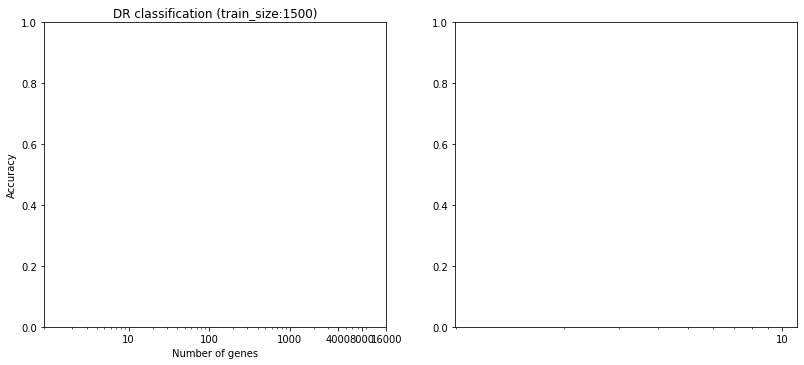

In [26]:
## Graphs for DR task

filename = "../experiments/results/fs_MB_A_DR.pkl"
results = pickle.load(open(filename, "rb"), encoding='latin1')

plt.rcParams['figure.figsize'] = (13.5, 5.6)
fig, axs = plt.subplots(1,2, sharex=True, sharey=False)

for i, plot_train_size in enumerate([1500,100]):
    subset = results[(results.train_size==plot_train_size) & 
                      (results.gene==plot_gene) & 
#                       (results.num_genes!=8000) &  
                      (results.num_genes!=2000) & 
                      (results.num_genes!=200) &
                      (results.num_genes!=500) &
                      (results.num_genes> 0)  &      
                      ((results.graph == "ontology_el_10" ) | (results.graph == "ontology_dl2vec_300" ) | (results.graph == "ontology_dl2vec_10_randomized" ))]

    q = subset.groupby(['model', 'graph', 'num_genes'])['acc']

    todo = [x for x in itertools.product(list(subset["graph"].unique()),list(subset["model"].unique()))]
    if plot_train_size == 100:
        for ls, (graph, model) in enumerate(sorted(todo)):
             if (('GCN_noemb_lay1_chan16' in model  and 'dropout' in model   and 'randomize' not in graph )  or \
                 'MLP_lay2' in model and 'dropout' in model):# or 'randomize' in graph):
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
#                     displayname = model.replace("CGN","GCN") +"_"+ graph
#                     displayname = displayname.replace("SLR", "SNLR")
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, ls='--' if 'rand' in graph else '-')
                except:
                    pass
    else:
        for ls, (graph, model) in enumerate(sorted(todo)):
            if  (('GCN_noemb_lay1_chan64_dropout_agg_hierarchical' in model and 'lr' not in model  and 'randomize' not in graph )  or \
                 ('MLP_lay2' in model and 'dropout' in model)):# or 'randomize' in graph):_lay1_chan64
                try:
                    index = list(q.mean()[model, graph].index)
                    mean = q.mean()[model,  graph]
                    stderr = q.std()[model,  graph]/np.sqrt(q.count()[model, graph])
                    displayname = 'GCN' if 'GCN' in model else 'MLP'
                    displayname += '_random_genes' if 'rand' in graph else "_ontology_selected_genes"
                    displayname = model+"_"+ graph
                    axs[i].errorbar(index, mean,label=displayname, xerr=0, yerr=stderr, 
                                    ls='--' if 'rand' in graph else '-',
                                    c= color_dict[displayname])
                except:
                    pass
    

    axs[i].set_title("DR classification (train_size:" + str(plot_train_size) +")")
    axs[i].set_ylabel("Accuracy")
    axs[i].set_xlabel("Number of genes")
    axs[i].set_xscale("log")
    axs[i].set_xticks([10,100,1000,4000,8000,16000])# sorted(subset["num_genes"].unique()))
    formatter = matplotlib.ticker.ScalarFormatter()
    plt.gca().xaxis.set_major_formatter(formatter)

        
    handles, labels = axs[i].get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    axs[i].legend(handles, labels, loc='lower right');
    
plt.savefig("../experiments/results/figures/fs-DR.eps", bbox_inches='tight', format='eps')
plt.show()
